Clone `github.com/adeelh/raster-vision:f4g-rv-input`.

Edit `docker/run` to ensure the dir with this notebook gets mounted somewhere inside the docker container.

Run `docker/run --aws --gpu --jupyter-lab`. Wait for a few seconds until the Jupyter Lab server starts.

In [1]:
import json
from matplotlib import pyplot as plt

from rastervision.core.box import Box
from rastervision.core.data import (
    ClassConfig, RasterioCRSTransformer, RasterioSource, 
    GeoJSONVectorSourceConfig, RasterizedSource, Scene,
    SemanticSegmentationLabelSource)

In [3]:
with open('freetown-sample-20220607/freetown-sample-20220607/freetown-image-sample.json') as f:
    img_info = json.load(f)['results'][0]

In [4]:
raster_source = RasterioSource(uris=[img_info['ingestLocation']], allow_streaming=True)

In [6]:
with open('freetown-sample-20220607/freetown-sample-20220607/freetown-label-class-definition-sample.json') as f:
    class_info = json.load(f)

class_config = ClassConfig(names=['background', class_info['name']], colors=['lightgray', class_info['colorHexCode']])

In [7]:
geojson_cfg = GeoJSONVectorSourceConfig(
    uri='freetown-sample-20220607/freetown-sample-20220607/freetown-labels-sample.geojson',
    default_class_id=1,
    ignore_crs_field=True)

crs_transformer = RasterioCRSTransformer.from_uri(img_info['ingestLocation'])
vector_source = geojson_cfg.build(class_config, crs_transformer)

In [8]:
label_source = SemanticSegmentationLabelSource(
    raster_source=RasterizedSource(
        vector_source=vector_source, 
        background_class_id=0,
        extent=raster_source.get_extent(),
        crs_transformer=crs_transformer),
    null_class_id=0)

In [9]:
scene = Scene('some_ID', raster_source, label_source)

In [10]:
window = Box(ymin=25132-1500, xmin=21707-1000, ymax=25132-500, xmax=21707)

In [16]:
with scene.activate():
    x, y = scene[window]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


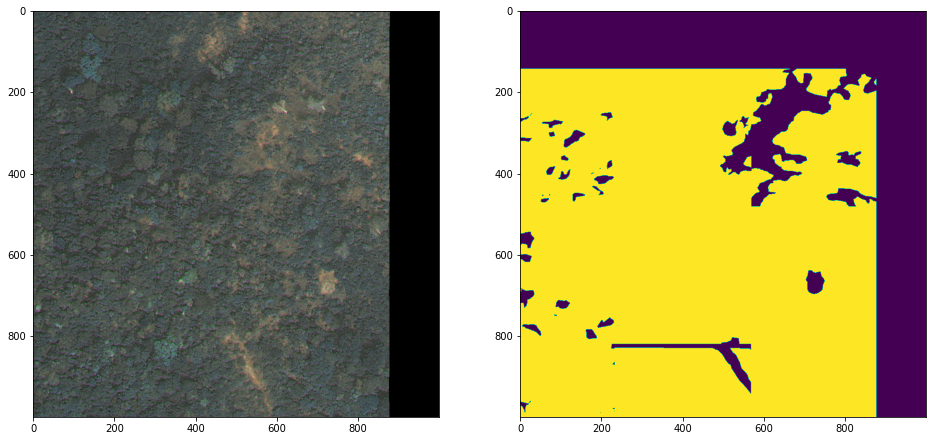

In [17]:
fig, (img_ax, label_ax) = plt.subplots(1, 2, squeeze=True, figsize=(16, 8))
img_ax.imshow(x[..., [4, 3, 2]])
label_ax.imshow(y)
plt.show()